<a href="https://colab.research.google.com/github/subhamNRchoudhary/All-Google-Colab/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

Import Dataset

In [ ]:
df = pd.read_csv('/content/sample_data/kc_house_data.csv')

In [ ]:
df = df.drop('id', axis=1)
df = df.drop('zipcode',axis=1)

In [ ]:
print(df.columns.values)

['date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'lat' 'long' 'sqft_living15' 'sqft_lot15']


In [ ]:
df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

df = df.drop('date',axis=1)

# Check the new columns
print(df.columns.values)

['price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'lat' 'long' 'sqft_living15' 'sqft_lot15'
 'month' 'year']


Splitdata

In [ ]:
# Features
X = df.drop('price',axis=1)

# Label
y = df['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15117, 19)
(6480, 19)
(15117,)
(6480,)


Normalization

In [ ]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0
Min:  0.0


Initilizaing ANN

In [ ]:
model = Sequential()

# input layer
model.add(Dense(19,activation='relu'))

# hidden layers
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# output layer
model.add(Dense(1))


Training ANN with Compile and fit

In [ ]:
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,
          epochs=400,
          verbose=2)

Epoch 1/400
119/119 - 2s - loss: 430223294464.0000 - val_loss: 418816491520.0000 - 2s/epoch - 13ms/step
Epoch 2/400
119/119 - 0s - loss: 427914035200.0000 - val_loss: 411063484416.0000 - 310ms/epoch - 3ms/step
Epoch 3/400
119/119 - 0s - loss: 398800519168.0000 - val_loss: 347475935232.0000 - 303ms/epoch - 3ms/step
Epoch 4/400
119/119 - 0s - loss: 278588686336.0000 - val_loss: 178460966912.0000 - 302ms/epoch - 3ms/step
Epoch 5/400
119/119 - 0s - loss: 128097968128.0000 - val_loss: 96877600768.0000 - 385ms/epoch - 3ms/step
Epoch 6/400
119/119 - 0s - loss: 98685706240.0000 - val_loss: 94399619072.0000 - 302ms/epoch - 3ms/step
Epoch 7/400
119/119 - 0s - loss: 96667205632.0000 - val_loss: 92651626496.0000 - 379ms/epoch - 3ms/step
Epoch 8/400
119/119 - 0s - loss: 94801453056.0000 - val_loss: 90841227264.0000 - 383ms/epoch - 3ms/step
Epoch 9/400
119/119 - 0s - loss: 92886106112.0000 - val_loss: 89091121152.0000 - 378ms/epoch - 3ms/step
Epoch 10/400
119/119 - 0s - loss: 90908786688.0000 - val_

Evaluation using loss function

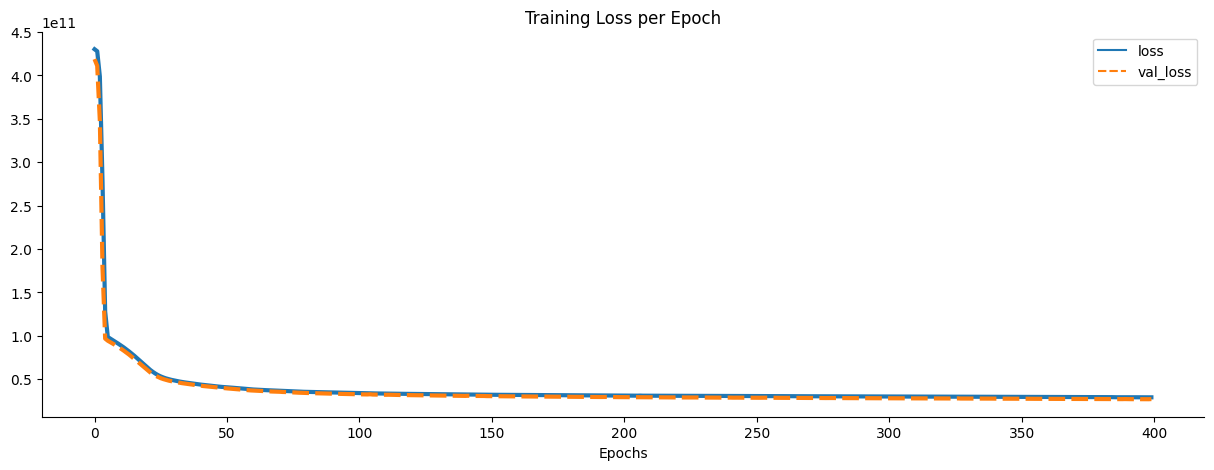

In [ ]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()